# Underfitting vs. Overfitting

http://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn import  metrics

Rozważmy następujący zbiór punktów:

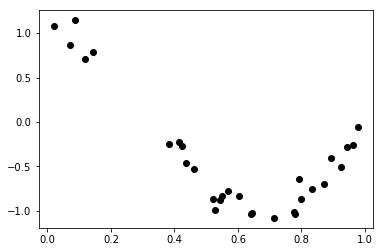

In [2]:
np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

true_fun = lambda X: np.cos(1.5 * np.pi * X)
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.plot(X, y, 'ok');
plt.show()

# Zadanie
Wykonaj regresję:
<ul>
<li>liniową</li>
<li>wielomianową stopnia $4$</li>
<li>wielomianową stopnia $15$</li>
<ul>

Narysuj wykres, który z nich reprezentuje Underfitting, a który Overfitting

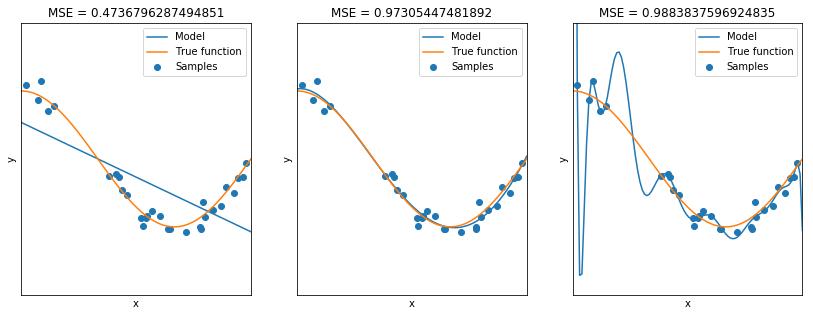

In [48]:
plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)
    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    
    scores = metrics.r2_score(y,  pipeline.predict(X[:, np.newaxis]))
    plt.title("MSE = {}".format(scores))
    plt.legend(loc="best")
plt.show()